## Business Understanding

Kanker payudara adalah suatu penyakit berbahaya yang mulai menyerang banyak orang. Dokterpun masih kesulitan dalam mengidentifikasi jenis penyakit ini sehingga peneliti memiliki ide untuk membuat kecerdasan buatan yang dapat memprediksi jenis penyakit ini dengan dataset yang telah disediakan guna mempermudah pekerjaan dokter dalam mengidentifikasi jenis penyakit ini

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from lazypredict.Supervised import LazyClassifier
import joblib

# Data Understanding

Disini, kita melakukan pembacaan data dan mmeload data kanker payudara

In [2]:
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df["target"] = cancer.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,...,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,0
1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,...,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,0
2,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,...,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,0
3,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,...,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,0
4,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,...,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.00,0.11,0.12,0.24,0.14,0.17,0.06,...,26.40,166.10,2027.00,0.14,0.21,0.41,0.22,0.21,0.07,0
565,20.13,28.25,131.20,1261.00,0.10,0.10,0.14,0.10,0.18,0.06,...,38.25,155.00,1731.00,0.12,0.19,0.32,0.16,0.26,0.07,0
566,16.60,28.08,108.30,858.10,0.08,0.10,0.09,0.05,0.16,0.06,...,34.12,126.70,1124.00,0.11,0.31,0.34,0.14,0.22,0.08,0
567,20.60,29.33,140.10,1265.00,0.12,0.28,0.35,0.15,0.24,0.07,...,39.42,184.60,1821.00,0.17,0.87,0.94,0.27,0.41,0.12,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Data Preparation

Disini, kita melakukan pembersihan data dan pengecekan data

In [4]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

# Exploratory Data Analysis

Disini, kita melakukan analisis terhadap data
Analisis data terbagi menjadi 3 yaitu :
1. Univariate Analysis (Analisis pada 1 variabel)
2. Bivariate Analysis (Analisis pada 2 variabel)
3. Multivariate Analysis (Analisis pada banyak variabel)

In [6]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

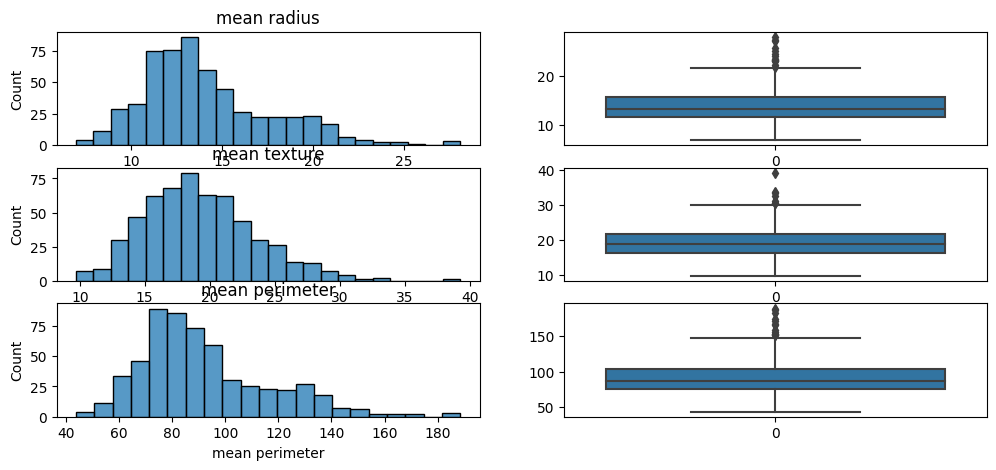

In [7]:
# Unnivariate Analysis of mean radius, mean_textur, mean_perimeter

fig, ax = plt.subplots(3, 2, figsize=(12, 5))
sns.histplot(data=df["mean radius"], ax=ax[0][0])
sns.boxplot(data=df["mean radius"], ax=ax[0][1])

sns.histplot(data=df["mean texture"], ax=ax[1][0])
sns.boxplot(data=df["mean texture"], ax=ax[1][1])

sns.histplot(data=df["mean perimeter"], ax=ax[2][0])
sns.boxplot(data=df["mean perimeter"], ax=ax[2][1])

ax[0][0].set_title("mean radius")
ax[1][0].set_title("mean texture")
ax[2][0].set_title("mean perimeter")

plt.show()

## MOdelling

Disini, kita membuat model machine learning

In [8]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [23]:
# 1. menggunakan lazy predict
lazy = LazyClassifier(verbose=0, ignore_warnings=True)
models, predictions = lazy.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 15.46it/s]

[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4540
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [24]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.98,0.98,0.98,0.98,0.02
PassiveAggressiveClassifier,0.98,0.98,0.98,0.98,0.02
SVC,0.98,0.98,0.98,0.98,0.02
Perceptron,0.97,0.97,0.97,0.97,0.02
AdaBoostClassifier,0.97,0.97,0.97,0.97,0.39
LogisticRegression,0.97,0.97,0.97,0.97,0.03
SGDClassifier,0.96,0.97,0.97,0.97,0.02
ExtraTreeClassifier,0.96,0.97,0.97,0.97,0.02
CalibratedClassifierCV,0.97,0.97,0.97,0.97,0.05


In [39]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
pipelines = {
    'svm': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', SVC())
    ]),
    'random_forest': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', RandomForestClassifier())
    ])
}

# Define parameter grids for GridSearchCV
param_grids = {
    'svm': {
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf']
    },
    'random_forest': {
        'clf__n_estimators': [50, 100, 200],
        'clf__max_depth': [None, 10, 20]
    }
}



In [40]:
best_models = {}
for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[model_name], cv=5)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_


In [43]:
for i, j in best_models.items():
    print(i, j.score(X_test, y_test))

svm 0.9824561403508771
random_forest 0.9649122807017544


In [44]:
joblib.dump(best_models["svm"], "best_models.joblib")

['best_models.joblib']

In [46]:
import pickle
with open('best_models.pickle', 'wb') as f:
    pickle.dump(best_models, f)

